# Retrieving track data from fastf1 library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import fastf1

In [3]:
session = fastf1.get_session(2024, 'Monaco', 'FP1')
session.load(telemetry=False)

laps = session.laps

all_weather = []

for lap_index, lap in laps.iterlaps():
    weather = lap.get_weather_data()
    
    all_weather.append(weather)

weather_df = pd.DataFrame(all_weather)
weather_df

req         WARNING 	DEFAULT CACHE ENABLED! (446.5 MB) C:\Users\chchr\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']


,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
12,0 days 00:12:55.707000,19.9,70.0,1018.5,False,36.5,156,0.9
14,0 days 00:14:55.714000,20.0,69.0,1018.4,False,36.5,0,0.9
15,0 days 00:15:55.725000,20.0,70.0,1018.5,False,36.7,200,0.4
17,0 days 00:17:55.760000,20.0,70.0,1018.5,False,36.7,0,0.5
18,0 days 00:18:55.825000,20.1,69.0,1018.5,False,37.1,222,1.1
...,...,...,...,...,...,...,...,...
68,0 days 01:08:56.121000,21.1,66.0,1017.8,False,36.2,0,0.4
70,0 days 01:10:56.123000,21.3,65.0,1017.8,False,35.5,209,0.5
71,0 days 01:11:56.130000,21.5,64.0,1017.8,False,35.4,223,1.3
72,0 days 01:12:56.125000,21.4,64.0,1017.8,False,35.4,218,0.9


In [4]:
weather_df = weather_df.drop(columns=['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'WindDirection', 'WindSpeed'])

In [5]:
weather_df.head()

,Time,TrackTemp
12,0 days 00:12:55.707000,36.5
14,0 days 00:14:55.714000,36.5
15,0 days 00:15:55.725000,36.7
17,0 days 00:17:55.760000,36.7
18,0 days 00:18:55.825000,37.1


In [6]:
weather_df.to_csv('weather_data.csv', index=False)

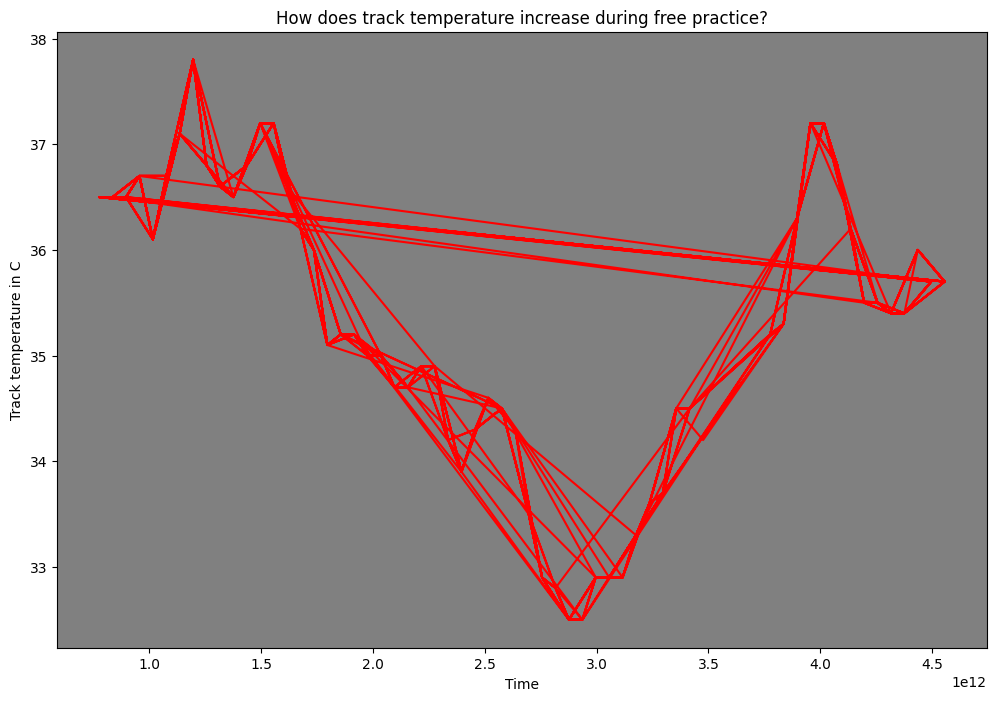

In [7]:
from fastf1 import plotting

fig, ax = plt.subplots(figsize=(12,8))


ax.plot(weather_df['Time'], weather_df['TrackTemp'], color='red')
ax.set_facecolor('grey')
ax.set_xlabel('Time')
ax.set_ylabel('Track temperature in C')
ax.set_title('How does track temperature increase during free practice?')
plt.savefig('track_temp.png')